In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [1]:
# load data
time = []
data = []
f = open('data.txt', 'rt')
count =0
for line in f:
    time.append(float(count)/100)
    data.append(float(line))
    count++


TypeError: range() integer step argument expected, got float.

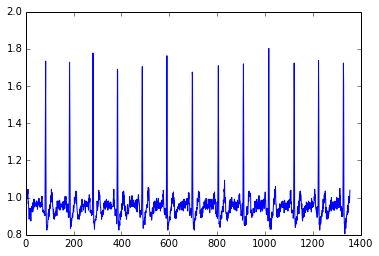

In [3]:
plt.plot(time, data)